<a href="https://colab.research.google.com/github/kritikasaraswat99/Data-Visualization/blob/main/Stats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook contains 2 usecases.

Download dataset used using respective links -

Usecase 1 - 
churn dataset = https://www.kaggle.com/becksddf/churn-in-telecoms-dataset

usecase 2 - 
stack Overflow Developer Survey = https://www.kaggle.com/mchirico/stack-overflow-developer-survey-results-2019

# **USE CASE - 1**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
ls

bigml_59c28831336c6604c800002a.csv  Stats.ipynb


In [ ]:
data = pd.read_csv('bigml_59c28831336c6604c800002a.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [ ]:
pd.unique(data['state'])

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [ ]:
len(pd.unique(data['phone number']))

3333

In [ ]:
pd.unique(data['international plan'])

array(['no', 'yes'], dtype=object)

In [ ]:
data['state']

0       KS
1       OH
2       NJ
3       OH
4       OK
        ..
3328    AZ
3329    WV
3330    RI
3331    CT
3332    TN
Name: state, Length: 3333, dtype: object

In [ ]:
data.describe()

account length    area code  ...  total intl charge  customer service calls
count     3333.000000  3333.000000  ...        3333.000000             3333.000000
mean       101.064806   437.182418  ...           2.764581                1.562856
std         39.822106    42.371290  ...           0.753773                1.315491
min          1.000000   408.000000  ...           0.000000                0.000000
25%         74.000000   408.000000  ...           2.300000                1.000000
50%        101.000000   415.000000  ...           2.780000                1.000000
75%        127.000000   510.000000  ...           3.270000                2.000000
max        243.000000   510.000000  ...           5.400000                9.000000

[8 rows x 16 columns]

In [ ]:
data.corr()

account length  ...     churn
account length                1.000000  ...  0.016541
area code                    -0.012463  ...  0.006174
number vmail messages        -0.004628  ... -0.089728
total day minutes             0.006216  ...  0.205151
total day calls               0.038470  ...  0.018459
total day charge              0.006214  ...  0.205151
total eve minutes            -0.006757  ...  0.092796
total eve calls               0.019260  ...  0.009233
total eve charge             -0.006745  ...  0.092786
total night minutes          -0.008955  ...  0.035493
total night calls            -0.013176  ...  0.006141
total night charge           -0.008960  ...  0.035496
total intl minutes            0.009514  ...  0.068239
total intl calls              0.020661  ... -0.052844
total intl charge             0.009546  ...  0.068259
customer service calls       -0.003796  ...  0.208750
churn                         0.016541  ...  1.000000

[17 rows x 17 columns]

how to pivot information using python for categorical values?

In [ ]:
#group by categorical columns - area code & voice mail plan
pd.pivot_table(data, index = ['area code','voice mail plan'], columns= ['international plan'], aggfunc=len)

account length       ... total night minutes       
international plan                    no  yes  ...                  no    yes
area code voice mail plan                      ...                           
408       no                         567   51  ...               567.0   51.0
          yes                        200   20  ...               200.0   20.0
415       no                        1082  102  ...              1082.0  102.0
          yes                        423   48  ...               423.0   48.0
510       no                         531   78  ...               531.0   78.0
          yes                        207   24  ...               207.0   24.0

[6 rows x 36 columns]

calculate the total international minutes for all the combinations above

In [ ]:
pd.pivot_table(data, 'total intl minutes', index = ['area code', 'voice mail plan'], columns = ['international plan'])

international plan                no        yes
area code voice mail plan                      
408       no               10.087302  10.821569
          yes              10.000500  10.720000
415       no               10.287061  10.605882
          yes              10.327896  11.193750
510       no               10.189642  10.167949
          yes               9.943961  10.600000

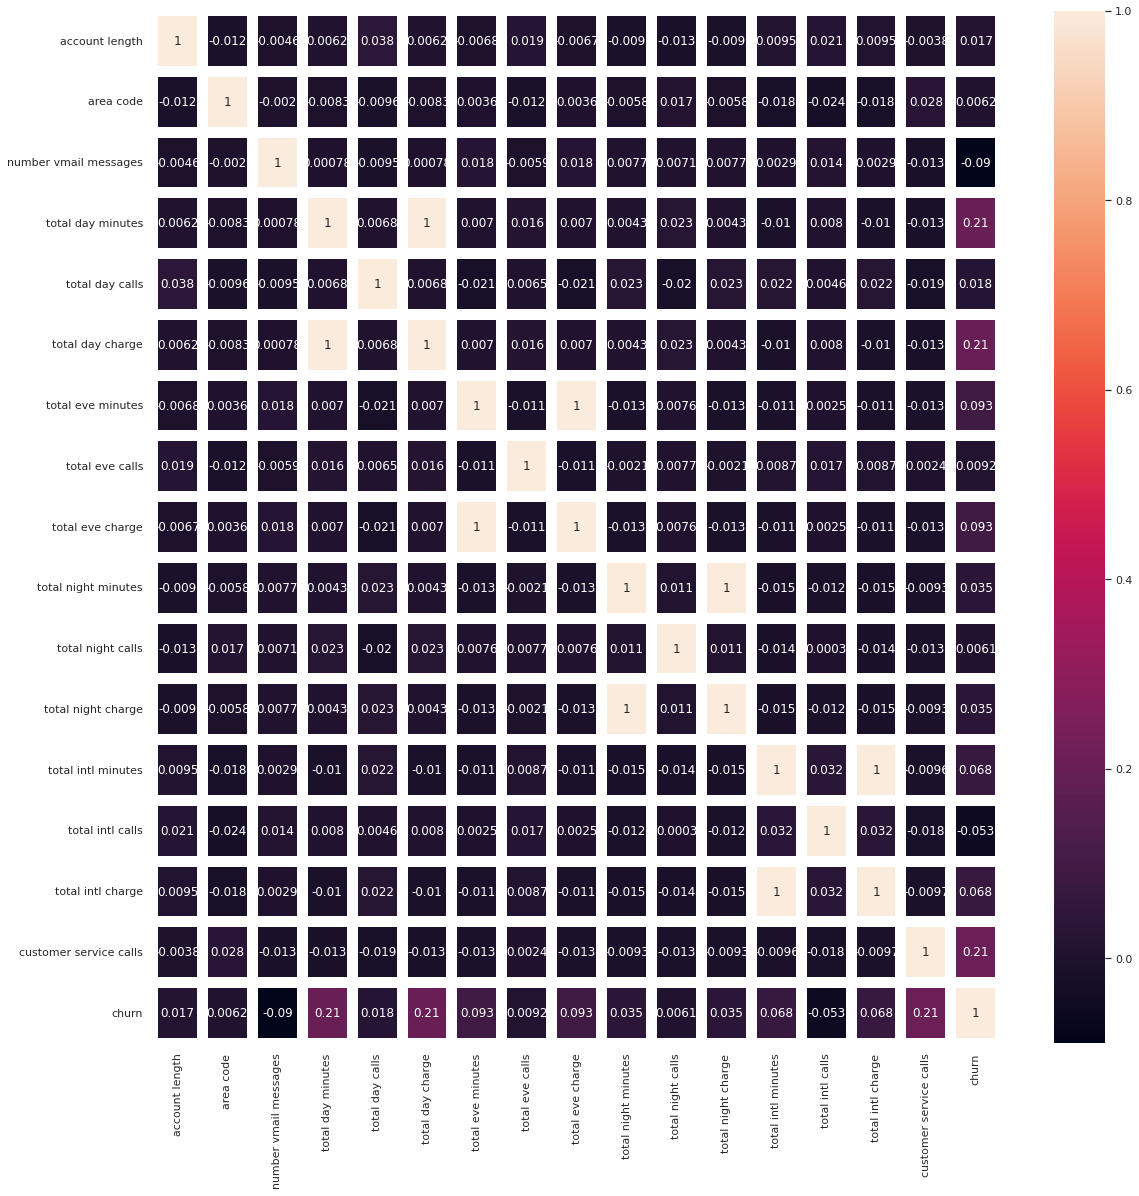

In [ ]:
plt.figure(figsize = (19,19))
sns.heatmap(data.corr(), annot = True,  linecolor='white', linewidth =10)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


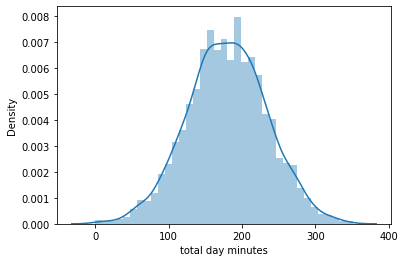

In [ ]:
sns.distplot(data['total day minutes'],kde=True)

How do we categorize the churner and non-churner for the time spend on day calls(total day minutes)?

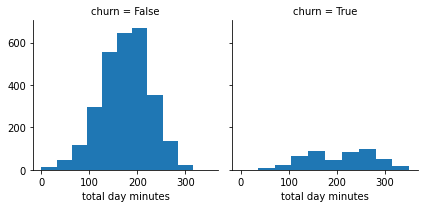

In [ ]:
g = sns.FacetGrid(data, col='churn')
g.map(plt.hist,"total day minutes")

Number of cutomers who did opt for voice mail plan

In [ ]:
data['voice mail plan'].value_counts(normalize = True)

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64

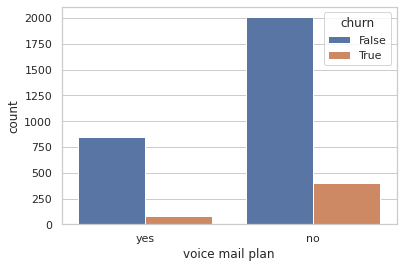

In [ ]:
sns.set(style ='whitegrid',color_codes = True)
sns.countplot(x='voice mail plan', hue ="churn", data = data)

crosstab = see two categorical columns

In [ ]:
pd.unique(data['area code'])

array([415, 408, 510])

In [ ]:
pd.crosstab(data['area code'], data['churn'])

churn      False  True 
area code              
408          716    122
415         1419    236
510          715    125

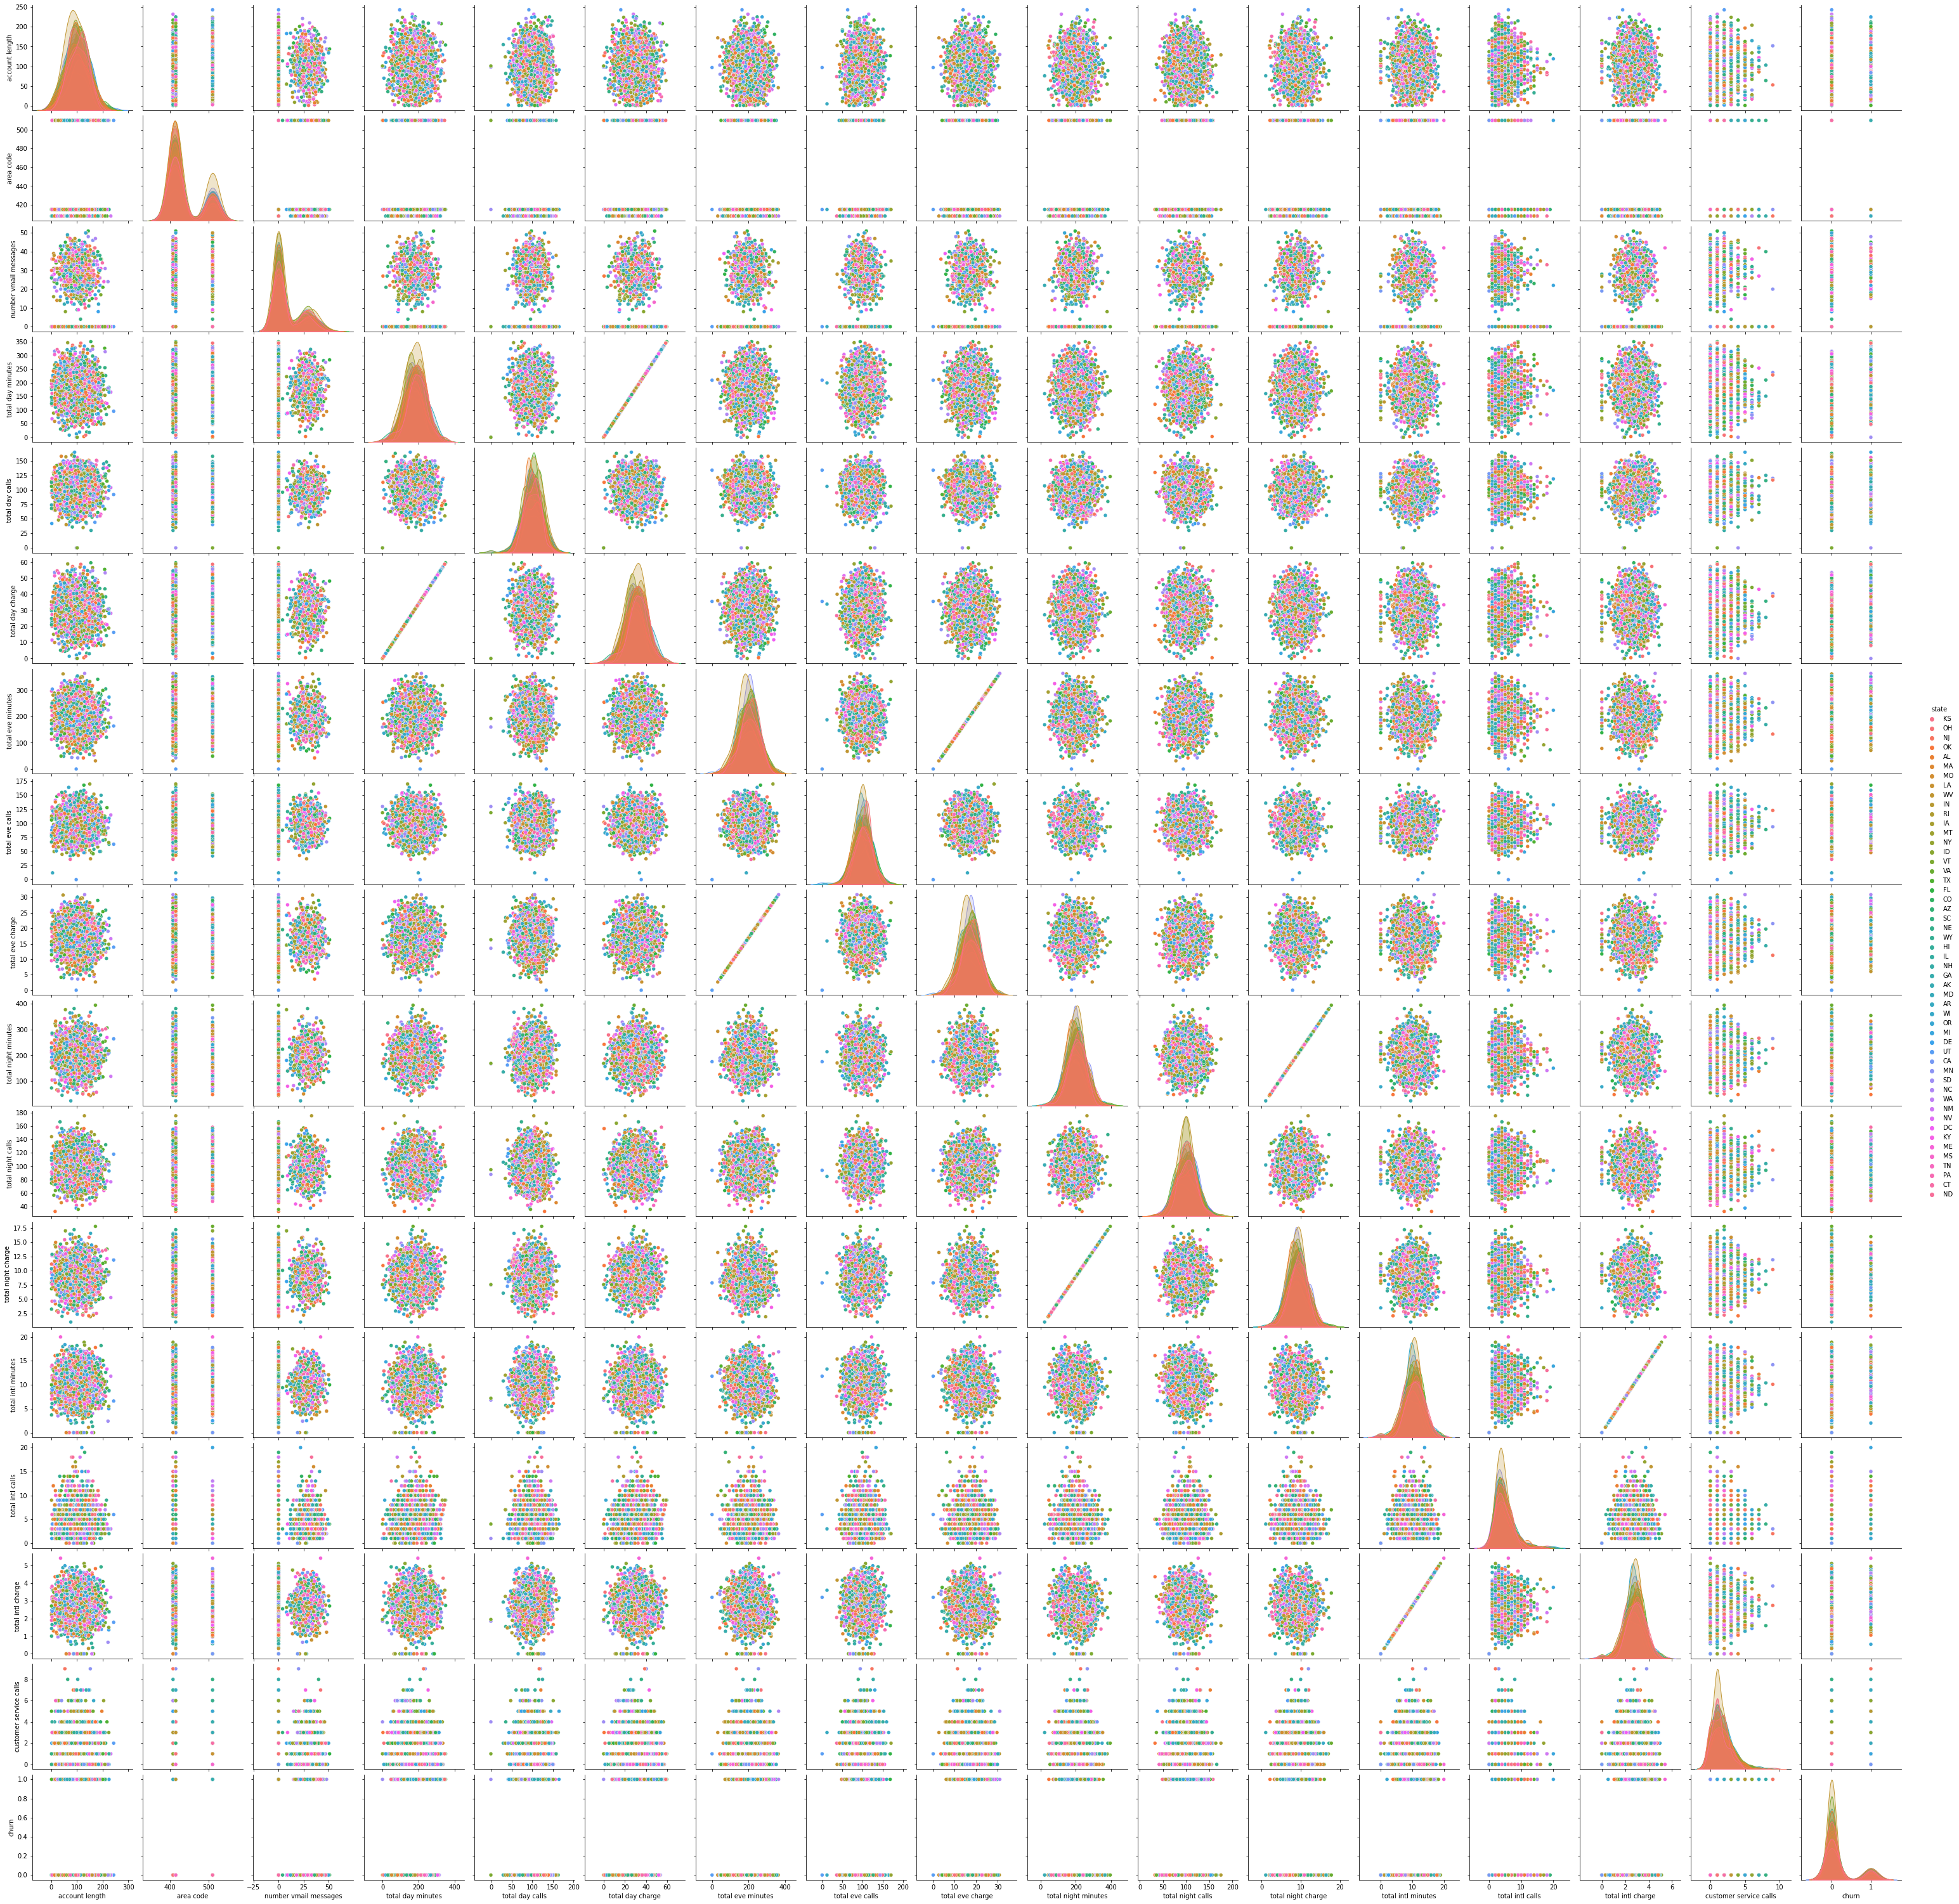

In [ ]:
sns.pairplot(data, hue="state")

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


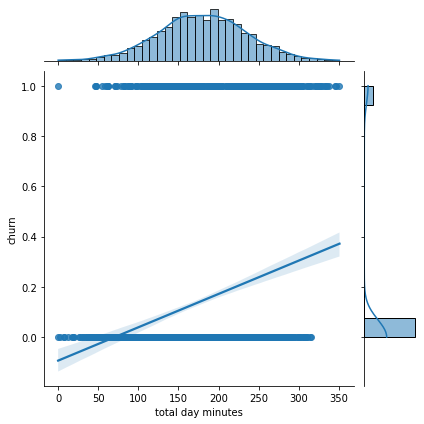

In [ ]:
sns.jointplot(x='total day charge', y='churn', data=data, kind='reg')

# **USE CASE - 2**

In [12]:
df = pd.read_csv('survey_results_public.csv')
questions = pd.read_csv("survey_results_schema.csv")

In [8]:
df.shape

(88883, 85)

In [9]:
df.head(2)

Respondent  ...                  SurveyEase
0           1  ...  Neither easy nor difficult
1           2  ...  Neither easy nor difficult

[2 rows x 85 columns]

In [32]:
len(pd.unique(df['Country']))

180

In [ ]:
df.info(verbose = True) #when you want pandas to print all the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88883 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              88883 non-null  int64  
 1   MainBranch              88331 non-null  object 
 2   Hobbyist                88883 non-null  object 
 3   OpenSourcer             88883 non-null  object 
 4   OpenSource              86842 non-null  object 
 5   Employment              87181 non-null  object 
 6   Country                 88751 non-null  object 
 7   Student                 87014 non-null  object 
 8   EdLevel                 86390 non-null  object 
 9   UndergradMajor          75614 non-null  object 
 10  EduOther                84260 non-null  object 
 11  OrgSize                 71791 non-null  object 
 12  DevType                 81335 non-null  object 
 13  YearsCode               87938 non-null  object 
 14  Age1stCode              87634 non-null

In [16]:
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Column        85 non-null     object
 1   QuestionText  85 non-null     object
dtypes: object(2)
memory usage: 1.5+ KB


In [17]:
questions.head()

Column                                       QuestionText
0   Respondent  Randomized respondent ID number (not in order ...
1   MainBranch  Which of the following options best describes ...
2     Hobbyist                            Do you code as a hobby?
3  OpenSourcer        How often do you contribute to open source?
4   OpenSource  How do you feel about the quality of open sour...

In [18]:
questions.loc[4,'QuestionText']

'How do you feel about the quality of open source software (OSS)?'

check missing value

In [19]:
df.isna().apply(pd.value_counts)

Respondent  MainBranch  Hobbyist  ...  Dependents  SurveyLength  SurveyEase
False     88883.0       88331   88883.0  ...       83059         86984       87081
True          NaN         552       NaN  ...        5824          1899        1802

[2 rows x 85 columns]

In [20]:
np.array(df.columns)

array(['Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'EduOther', 'OrgSize', 'DevType', 'YearsCode',
       'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot',
       'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'LastInt',
       'FizzBuzz', 'JobFactors', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp',
       'WorkWeekHrs', 'WorkPlan', 'WorkChallenge', 'WorkRemote',
       'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'LanguageWorkedWith',
       'LanguageDesireNextYear', 'DatabaseWorkedWith',
       'DatabaseDesireNextYear', 'PlatformWorkedWith',
       'PlatformDesireNextYear', 'WebFrameWorkedWith',
       'WebFrameDesireNextYear', 'MiscTechWorkedWith',
       'MiscTechDesireNextYear', 'DevEnviron', 'OpSys', 'Containers',
       'BlockchainOrg', 'BlockchainIs', 'Bett

In [21]:
df.Country.value_counts().head()

United States     20949
India              9061
Germany            5866
United Kingdom     5737
Canada             3395
Name: Country, dtype: int64

#how many users are there from each country

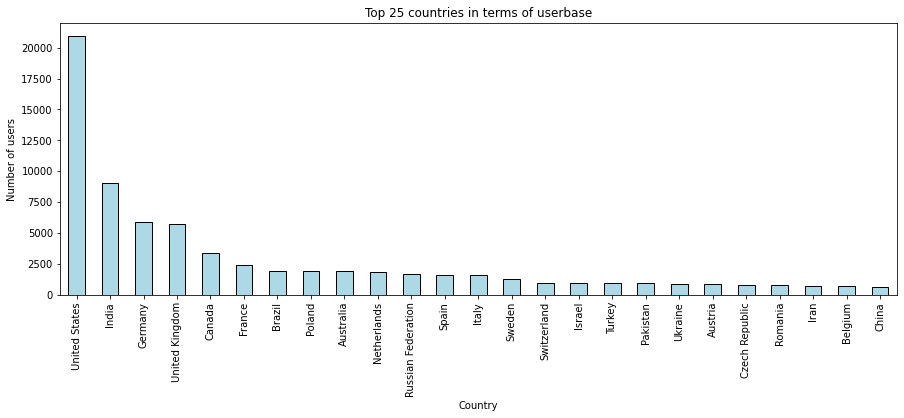

In [31]:
plt.figure(figsize=(25,25))
df.Country.value_counts().head(25).plot(kind = 'bar', edgecolor = 'black', color = 'lightblue', figsize = (15,5))
plt.xlabel('Country')
plt.ylabel('Number of users')
plt.title('Top 25 countries in terms of userbase')
plt.show()

In [34]:
df.Country.value_counts()

United States            20949
India                     9061
Germany                   5866
United Kingdom            5737
Canada                    3395
                         ...  
Saint Kitts and Nevis        1
Dominica                     1
Sao Tome and Principe        1
North Korea                  1
Tonga                        1
Name: Country, Length: 179, dtype: int64

In [36]:
top25 = df.loc[df.Country.isin(df.Country.value_counts().head(25).index), :]

In [39]:
top25.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70334 entries, 0 to 88882
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              70334 non-null  int64  
 1   MainBranch              70058 non-null  object 
 2   Hobbyist                70334 non-null  object 
 3   OpenSourcer             70334 non-null  object 
 4   OpenSource              68775 non-null  object 
 5   Employment              69115 non-null  object 
 6   Country                 70334 non-null  object 
 7   Student                 69135 non-null  object 
 8   EdLevel                 68541 non-null  object 
 9   UndergradMajor          60286 non-null  object 
 10  EduOther                66912 non-null  object 
 11  OrgSize                 57670 non-null  object 
 12  DevType                 64477 non-null  object 
 13  YearsCode               69705 non-null  object 
 14  Age1stCode              69475 non-null

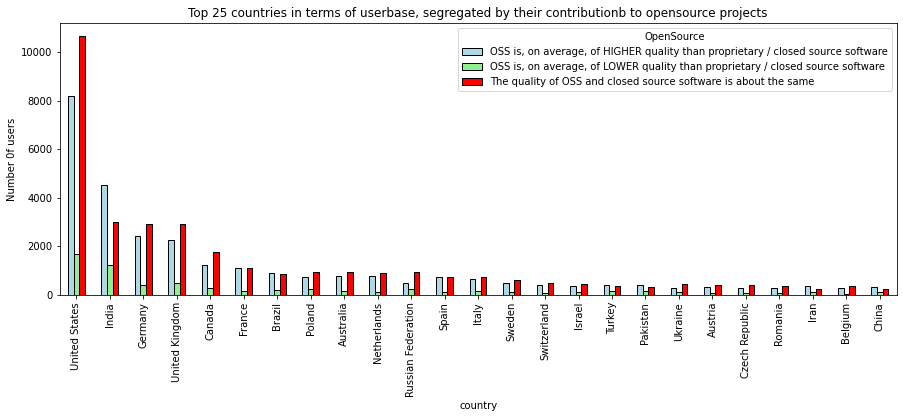

In [46]:
pd.crosstab(top25.Country, top25.OpenSource).loc[df.Country.value_counts().head(25).index,:].plot(kind = 'bar',
                                                                                                  edgecolor = 'black',
                                                                                                  color = ['lightblue',
                                                                                                           'lightgreen','red'],
                                                                                                  figsize = (15,5))

plt.xlabel('country')
plt.ylabel('Number 0f users')
plt.title('Top 25 countries in terms of userbase, segregated by their contributionb to opensource projects')
plt.show()

In [47]:
df.DevType.unique()

array([nan,
       'Developer, desktop or enterprise applications;Developer, front-end',
       'Designer;Developer, back-end;Developer, front-end;Developer, full-stack',
       ...,
       'Developer, full-stack;Developer, game or graphics;Developer, mobile;Marketing or sales professional;Product manager',
       'Data or business analyst;Data scientist or machine learning specialist;Developer, full-stack;DevOps specialist;Engineer, data;Engineer, site reliability;Student',
       'Developer, QA or test;Student;System administrator'], dtype=object)

In [51]:
df.DevType.apply(lambda x: x.split(sep = ';')) #bcz of missing values

AttributeError: ignored

In [52]:
def split_title(title):

  try:
    return title.split(sep=';')
  except:
      return []

In [53]:
title = df.DevType.apply(lambda x: split_title(x))
title.head()

0                                                   []
1    [Developer, desktop or enterprise applications...
2    [Designer, Developer, back-end, Developer, fro...
3                              [Developer, full-stack]
4    [Academic researcher, Developer, desktop or en...
Name: DevType, dtype: object

In [55]:
title_list = []

for composite_title in df.DevType:
  title_list.extend(split_title(composite_title))

In [56]:
title_list

['Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Designer',
 'Developer, back-end',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, full-stack',
 'Academic researcher',
 'Developer, desktop or enterprise applications',
 'Developer, full-stack',
 'Developer, mobile',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Engineer, data',
 'Designer',
 'Developer, front-end',
 'Developer, back-end',
 'Engineer, site reliability',
 'Database administrator',
 'Developer, back-end',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, QA or test',
 'DevOps specialist',
 'Data or business analyst',
 'Data scientist or machine learning specialist',
 'Database administrator',
 'Developer, back-end',
 'Developer, desktop or enterprise applications',
 'Developer, front-end',
 'Developer, full-stack',
 'Developer, game or graphics',
 'Educator',
 'Data or business analyst',
 'Data scientist

In [57]:
len(np.unique(title_list))

24

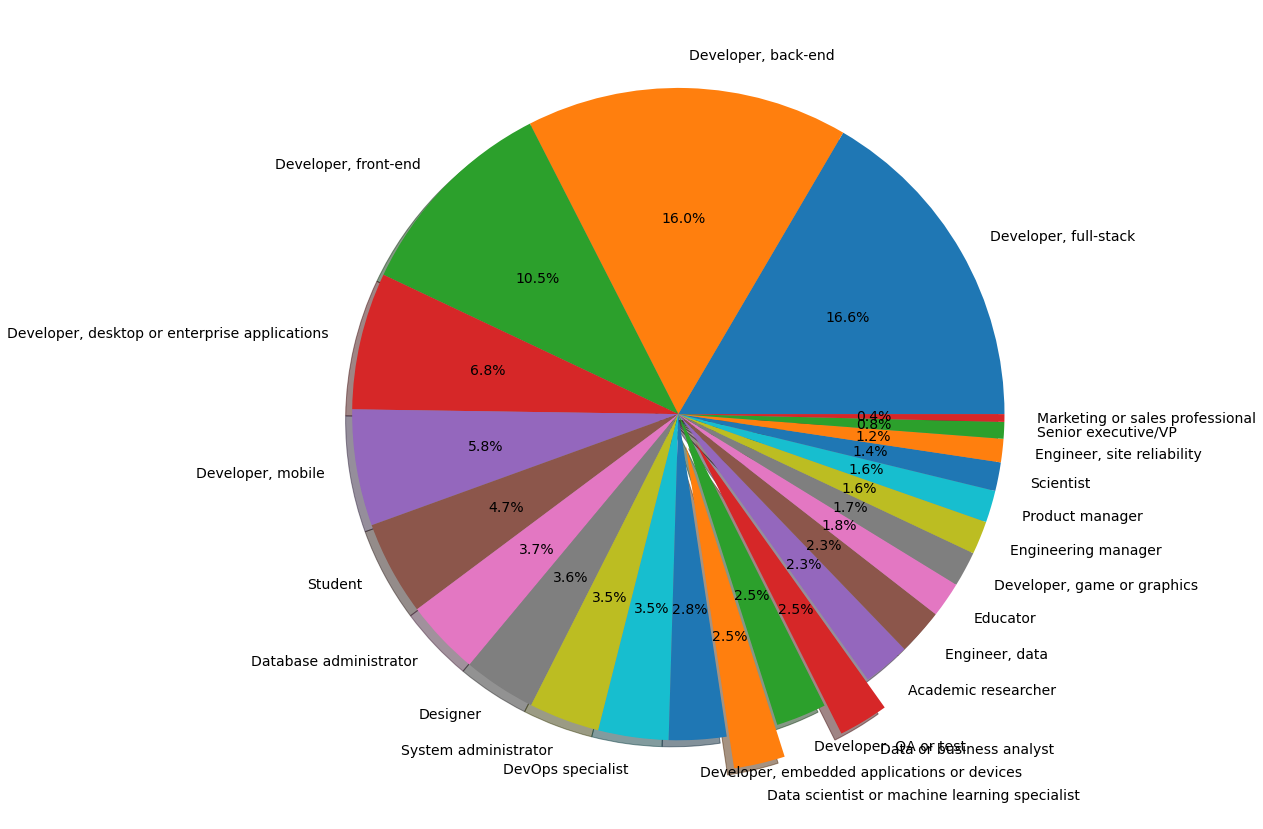

In [60]:
series = pd.Series(title_list).value_counts()
explode = np.zeros(len(series))

indices = series.index.isin(['Data or business analyst', 'Data scientist or machine learning specialist'])

explode[indices] = 0.1

plt.figure(figsize=(15,15))

plt.pie(series,labels = series.index, autopct='%.1f%%',shadow = True, explode = explode, textprops={'fontsize': 14})

plt.show()